In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ast import literal_eval
import pickle

In [51]:
with open('relevant.pickle',"rb") as f:
    relevant = pickle.load(f)

In [52]:
with open('retrieved_mooz.pickle',"rb") as f:
    retrieved = pickle.load(f)

In [53]:
relevant

,trump,global warming,climate change,global warming is a hoax,rising ocean temperatures,next year's midterm elections,queensland coast in australia's north east,waste water purification,hole in the ozone layer,biggest long-term threat facing the reef
snippet,"[calling. donald trump, who said climate chang...","[global warming including global cooling, glob...",[on climate change? and blame the tsunami on c...,"[news just called it the great freeze, is our ...",[neighbouring ones. what is the solution? risi...,[about climate change. much of their anger was...,[drive out the algae that give them colour. an...,"[mccarthy cared about was climate change, they...","[effective version of a carbon tax, in favor o...",[on climate change. the government in canberra...
time,1.1673,0.95575,2.32332,1.65279,0.121295,0.181505,0.997714,0.0363712,0.97001,0.993939


In [54]:
retrieved

,trump,global warming,climate change,global warming is a hoax,rising ocean temperatures,next year's midterm elections,queensland coast in australia's north east,waste water purification,hole in the ozone layer,biggest long-term threat facing the reef
snippets,[over climate change. president trump tweeted ...,[addressing global warm and striking a balance...,[obamao. beto o'rourke dropping his climate ch...,"[i'll say this, listen, chris, the republican ...",[the ocean. d. just think about this for a min...,[order republicans to prevail on doing anythin...,[drive out the algae that give them colour. an...,[the united nations is warning there will be w...,"[there is smoke, they generate a lot of pm 2.5...","[climate change, the biggest existential threa..."
time,5.11809,7.89749,13.9499,9.54989,7.57889,11.8491,5.25233,4.9336,0.583165,8.17648


In [55]:
pnum = 0
pden = 0
rden=0

queryfile="sample_queries"
inputfile= open(queryfile,"r")
q=[]
#Precision=Total number of documents retrieved that are relevant/Total number of documents that are retrieved.
#Recall=Total number of documents retrieved that are relevant/Total number of relevant documents in the database.
for line in (inputfile.read().split('\n')):
    q.append(line)
    pnum+=len(set((retrieved[line][0])).intersection((relevant[line][0])))
    pden+=len(set(retrieved[line][0]))
    rden+=len(set(relevant[line][0]))
print("Precison: ",pnum/pden)
print("Recall: ",pnum/rden)
inputfile.close()

Precison:  0.15300127713920816
Recall:  0.022679085264273816


In [47]:
p=[]
r=[]

for k in range(1,1000,10):
    for line in q:
        #print(line)
        pnum+=len(set((retrieved[line][0][:k])).intersection((relevant[line][0])))
        pden+=len(set(retrieved[line][0][:k]))
        rden+=len(set(relevant[line][0]))
    p.append(pnum/pden)
    r.append(pnum/rden)

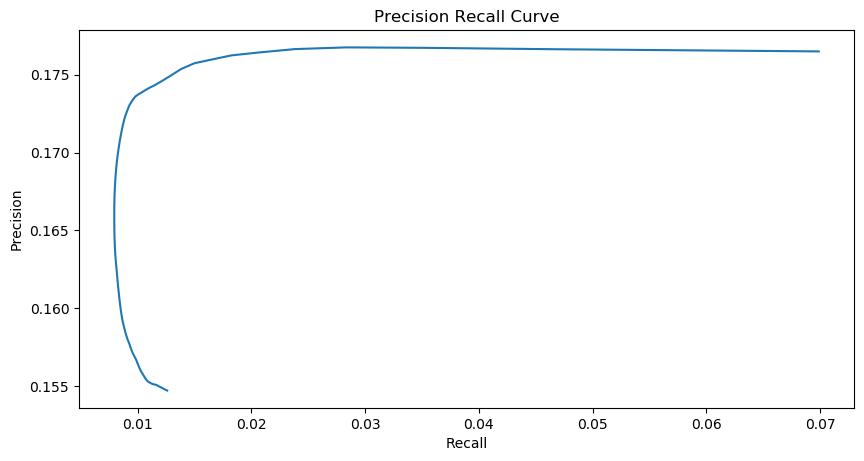

In [48]:
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(r, p)
plt.xlabel("Recall")
plt.title('Precision Recall Curve')
plt.ylabel("Precision")
plt.show()

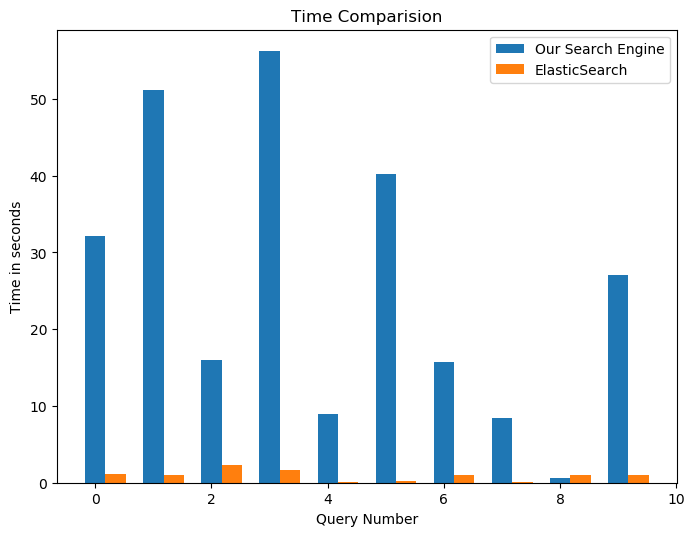

In [49]:
plt.figure(figsize=(8, 6), dpi=100)
ind = np.arange(10) 
width = 0.35       
plt.bar(ind, list(retrieved.loc["time"]), width, label='Our Search Engine')
plt.bar(ind + width, list(relevant.loc["time"]), width,
    label='Elastic search')

plt.xlabel("Query ")
plt.ylabel('Time')
plt.title('Time taken')

plt.legend(loc='upper right')
plt.show()